# Assignment 04
# Due: Wednesday, June 26, 2024, 3:59 PM
## Instructions:
1. Once the notebook is completed, export to .py file.  Submit both the notebook and the .py file.  To do this, click export at the top of the notebook or ctrl + shift + p at the top of the notebook and type in export.  Export to python file should show up as a search result.  Also:
    - Ensure that your .py file is an exact replica of your .ipynb file.  
    - Ensure your .py and .ipynb files run successfully without any errors.  You should be able to click `Run All` in VS Code and run the notebook without error before converting to a .py file.  When completed, you should be able to run the .py file from the terminal or command prompt.
2. DO NOT submit the data from the assignment and keep your data file and python file in the same directory. Do not use your local directory path to read files (e.g., avoid using paths like C:/your/directory/file.csv).  Just read in the file directly as if though it was in the same directory as your .ipynb file.  DO NOT CHANGE THE NAME OF THE FILE....
3. Whenever we ask to .head(10) the results or print out a value, please use `print()` so for example `print(df.head(10))`. Print only the answers to the questions that have been asked.  Do not print the head of a dataset unless explicitly asked. 
4. Whenever displaying a graph use `plt.show()`
5. For theoretical answers/short answers, please use print() (e.g., print("your answer")).
6. Wherever we have code displayed to print out values, use that code as a template to print out your output.  For example, if we give you `print(f'Threshold for best accuracy: {}')` please use code in this style to print out your output.  For some questions, this is only a template as we expect you to print out multiple answers (For example....Fit a linear regression model to each of the 5 features INDIVUDALLY and print out the slope and intercept for each. (Don't forget train/test split) requires you use the template for each feature)
7. Do not include pip install commands in your code. You can assume that all required libraries are already installed.

# Assignment 4: PCA with Crop Data

## Instructions:

Download your file from [here](https://clarksonmsda.org/datafiles/crop_yields/) or grab it from the zip file provided.  Your number is the same as in the last assignments.  This file has a number of nutrient columns which indicate how much of a particular nutrient is applied to a plot of land and a yield column which indicates the yield from that particular plot of land.  Our goal is to reduce the number of features using PCA.

In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. 

- a. Create a correlation matrix for the entire dataframe.

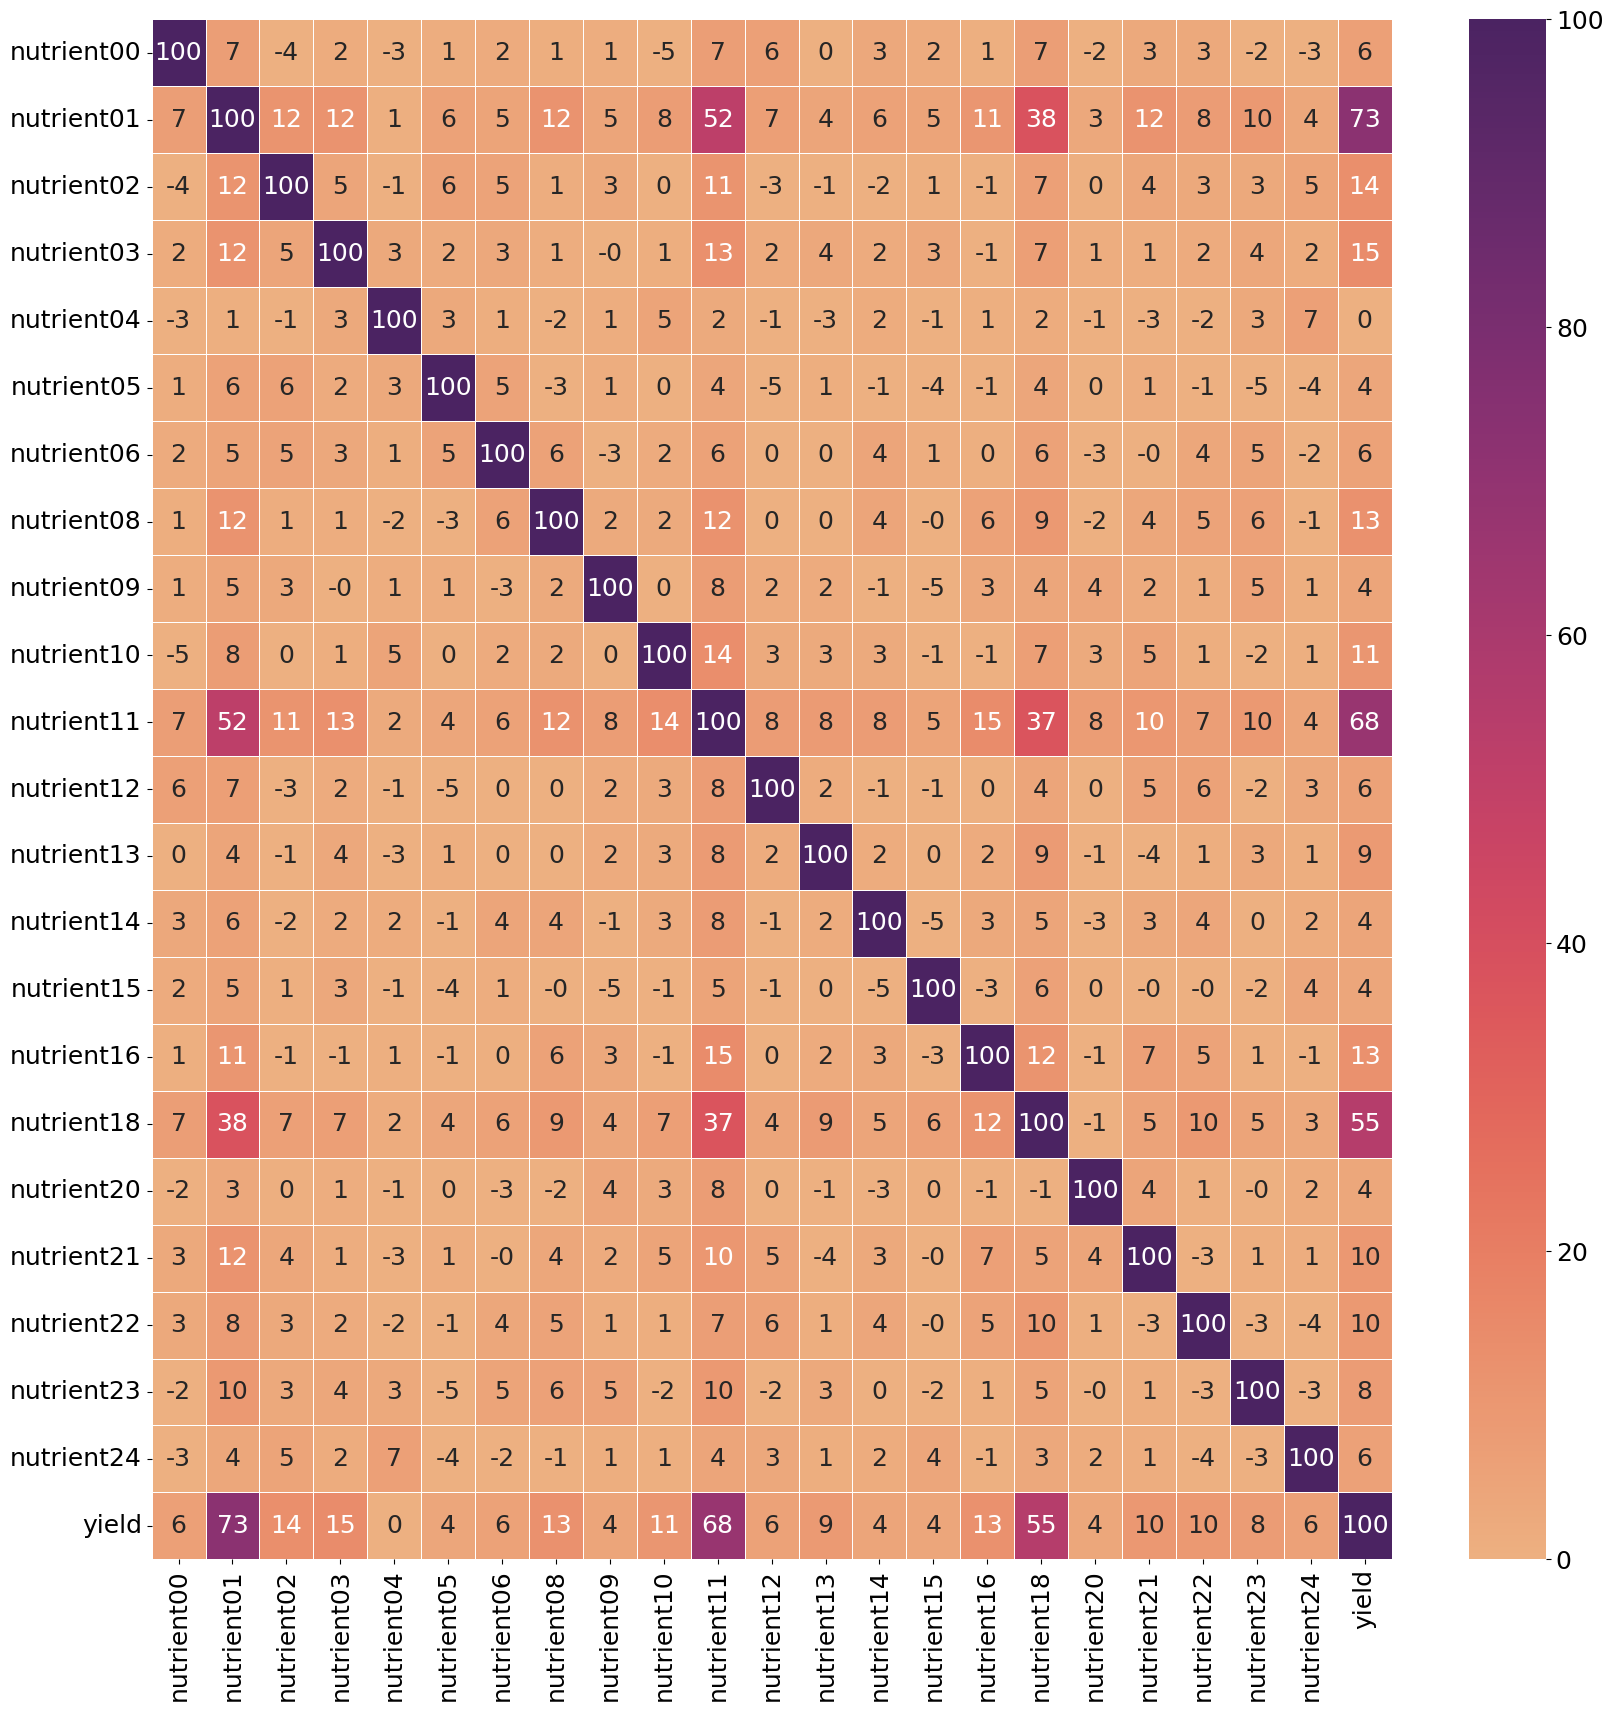

In [24]:
yield_data = pd.read_csv('yields12.csv', index_col=0)
corr = yield_data.corr(method='pearson') *100
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidth=.5, vmin=0, vmax=100,
            fmt=".0f", cmap=sns.color_palette("flare", as_cmap=True))
plt.show()

- b. What nutrients seem most correlated with the yield variable?

In [25]:
corr_long = corr.stack().reset_index()
 
corr_long.columns = ['Nutrient1', 'Nutrient2', 'Correlation']

corr_long = corr_long[corr_long['Nutrient1'] != corr_long['Nutrient2']]

max_corr = corr_long.loc[corr_long['Correlation'].idxmax()]

print(f"Highest correlation is between {max_corr['Nutrient1']} and {max_corr['Nutrient2']} with a value of %{max_corr['Correlation']:,.2f}")

Highest correlation is between nutrient01 and yield with a value of %73.02


- c. What nutrients are highly correlated with each other and seem to be candidates for combining with PCA

In [26]:
nutri_corr = corr_long[corr_long['Nutrient1'] != corr_long['Nutrient2']]

nutri_corr = nutri_corr.query("Nutrient1 != Nutrient2 and not Nutrient1.str.contains('yield', case=False) and not Nutrient2.str.contains('yield', case=False)")

nutri_max_corr = nutri_corr.loc[nutri_corr['Correlation'].idxmax()]

print(f"Highest correlation is between {nutri_max_corr['Nutrient1']} and {nutri_max_corr['Nutrient2']} with a value of %{nutri_max_corr['Correlation']:,.2f}")

Highest correlation is between nutrient01 and nutrient11 with a value of %52.32


## 2.

Scale the data and transform your data with PCA. Remember only select your x variables.  Use 42 for your random seed for PCA.

In [27]:
scaler = StandardScaler()
column_name = yield_data.drop(columns=['yield'])
scaled_data = scaler.fit_transform(column_name)

pca_model = PCA(random_state=42)
pca_data = pca_model.fit_transform(scaled_data)

- b. Plot a Scree plot to show the variance explained by PCs

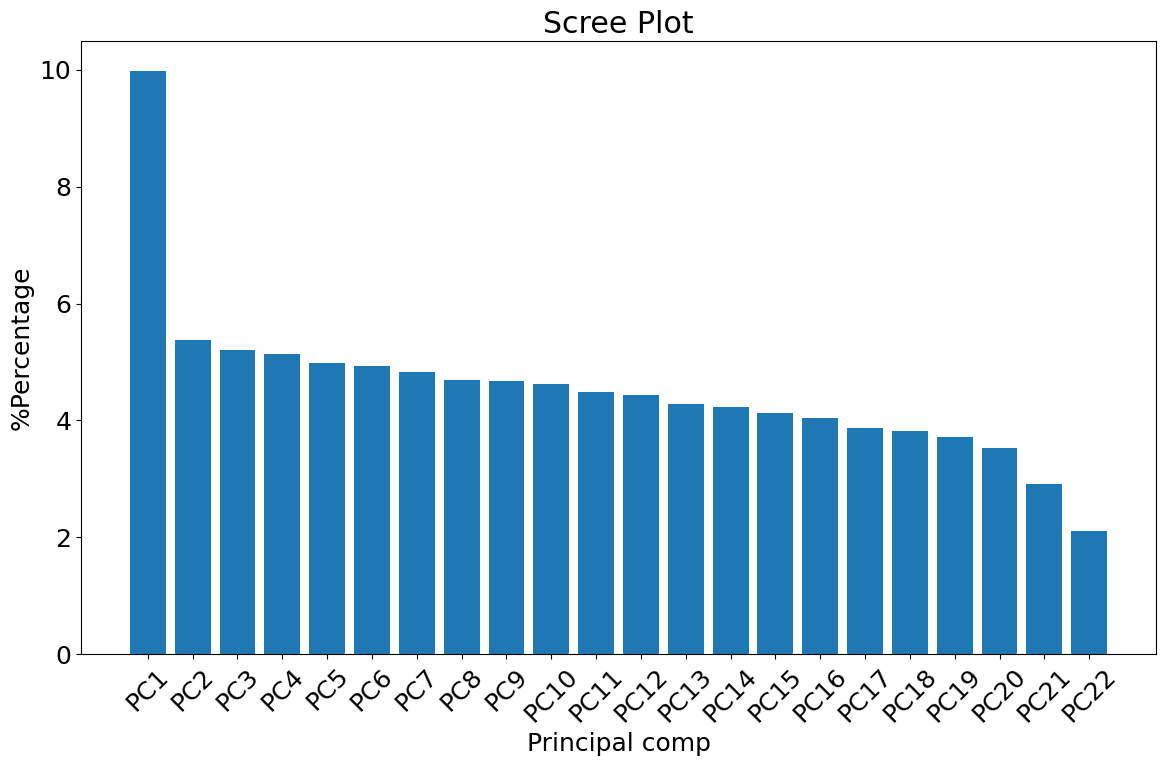

In [28]:
plt.figure(figsize=(12,8))

per_var = np.round(pca_model.explained_variance_ratio_*100,2)

labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

plt.xticks(rotation=45)
plt.ylabel('%Percentage')
plt.xlabel('Principal comp')
plt.title('Scree Plot')
plt.tight_layout()
plt.show()

- c. How many principal components are needed to explain at least 80% of the variance?

In [29]:
pca = PCA(n_components=0.80, random_state=42)
pca_data = pca.fit_transform(scaled_data)
print(f'{len(pca.explained_variance_ratio_)} number of principal components are needed to explain at least 80% of the variance')

16 number of principal components are needed to explain at least 80% of the variance


## 3.

- a. Generate a single loadings chart like we did in class.  You can accomplish this by using the first and third way we accomplished this in class, but not the second.  Don't use plotly.

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [22] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [21] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[21]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


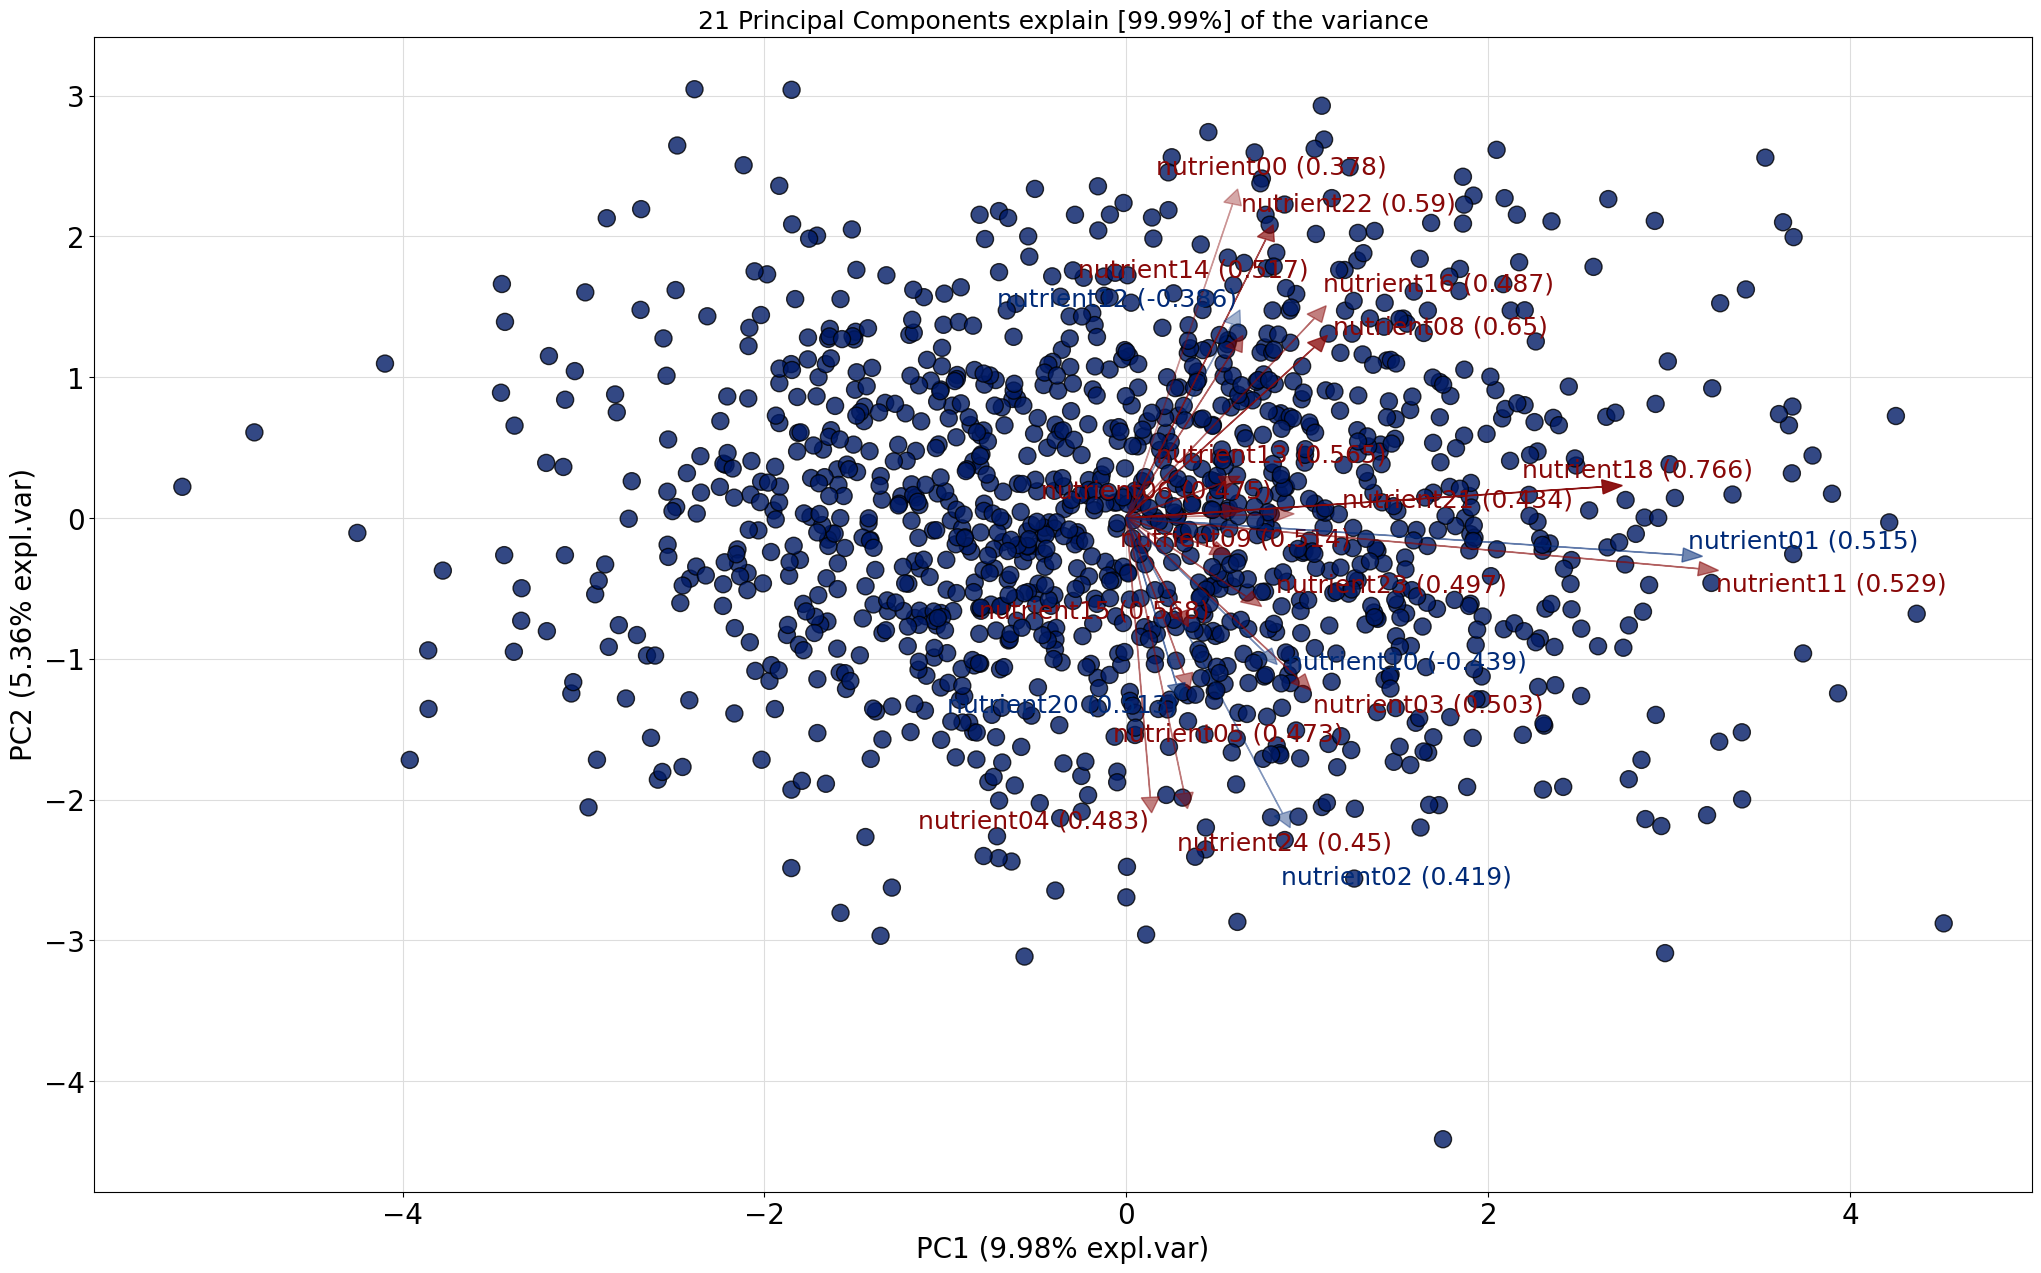

In [30]:
from pca import pca
scaled_yield_df = pd.DataFrame(scaled_data, columns=column_name.columns)
model = pca()
result =model.fit_transform(X=scaled_yield_df)

fig, ax = model.biplot()

- b. Which nutrients seem to contribute the most to the first principal component?

In [31]:

loadings = model.results['loadings']

loadings_df = pd.DataFrame(loadings, columns=scaled_yield_df.columns)

pc1_loadings = loadings_df.iloc[0]

max_contributing_nutrient = pc1_loadings.abs().idxmax()
max_contributing_value = pc1_loadings[max_contributing_nutrient]

print(f"The nutrient that contributes the most to PC1 is {max_contributing_nutrient} with a loading value of %{max_contributing_value * 100:,.2f}")

The nutrient that contributes the most to PC1 is nutrient11 with a loading value of %52.92


- c. Does this back up your analysis of the correlation matrix in question 1c?

In [32]:
print("""Yes, this does back up the analysis in question 1C as nutrient1 still the highest corrolated nutrient """)

Yes, this does back up the analysis in question 1C as nutrient1 still the highest corrolated nutrient 


## 4. 

- a. Use the first two principal components to fit a regression with yield as the y variable.  Remember to create a train test split.  Use a test size of 0.2 and a random seed of 42.  Print out the coefficients and intercept for your line

In [33]:
pc1 = result['PC'].iloc[:, 0]
pc2 = result['PC'].iloc[:, 1]

X = pd.DataFrame({'PC1': pc1, 'PC2': pc2})

y = yield_data['yield']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr = lr.fit(X_train,y_train)

In [34]:
print(f'Feature Name: {list(X.columns)}\n  Weight: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Feature Name: ['PC1', 'PC2']
  Weight: [ 1.11263129 -0.09159943]
Intercept: 40.1464940865752


- b. Print out the R^2 and MSE for the training and test data.

In [35]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred):,.2f}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):,.2f}\n-----------------')

print(f'Training R^2: {lr.score(X_train, y_train):,.2f}')
print(f'Test R^2: {lr.score(X_test, y_test):,.2f}')

Training MSE: 1.65
Test MSE: 1.69
-----------------
Training R^2: 0.62
Test R^2: 0.59


## 5.

- a. Fit a line with the first three principal components and print out the coefficients and intercept.  Use the same train test split as before

In [36]:
pc1 = result['PC'].iloc[:, 0]
pc2 = result['PC'].iloc[:, 1]
pc3 = result['PC'].iloc[:, 2]

X = pd.DataFrame({'PC1': pc1, 'PC2': pc2, 'PC3':pc3})

y = yield_data['yield']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lr = LinearRegression()

lr = lr.fit(X_train,y_train)
print(f'Feature Name: {list(X.columns)}\n  Weight: {lr.coef_}')
print(f'Intercept: {lr.intercept_:,.2f}')

Feature Name: ['PC1', 'PC2', 'PC3']
  Weight: [ 1.11351562 -0.09159356 -0.05130051]
Intercept: 40.15


- b. Print out the R^2 and the MSE for the training and test data

In [37]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred):,.2f}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):,.2f}\n-----------------')

print(f'Training R^2: {lr.score(X_train, y_train):,.2f}')
print(f'Test R^2: {lr.score(X_test, y_test):,.2f}')

Training MSE: 1.64
Test MSE: 1.70
-----------------
Training R^2: 0.63
Test R^2: 0.59


- c. Did the test R^2 or MSE improve?

In [38]:
print("""Only the test Mean Square Error has improved and all others remained the same.""")

Only the test Mean Square Error has improved and all others remained the same.


## 6.

- a. Fit a line with the principal components that explain 80% of the variance and print out the coefficients and intercept.  Use the same train test split as before

In [39]:
pca = PCA(n_components=0.80, random_state=42)
pca_data = pca.fit_transform(scaled_data)

num_components = pca_data.shape[1]
pca_columns = [f'PC{i+1}' for i in range(num_components)]

X = pd.DataFrame(pca_data, columns=pca_columns)
y = yield_data['yield']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Feature Name: \n{list(X.columns)}\n\n  Weight:{lr.coef_}\n')
print(f'Intercept: {lr.intercept_:,.2f}')

Feature Name: 
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']

  Weight:[ 1.1147681  -0.10223644 -0.04759027  0.11980893  0.03433553  0.06398786
  0.06311378 -0.13507333  0.08037665 -0.09737947  0.06178551 -0.02934006
  0.05707436 -0.13388848 -0.19835492 -0.27450045]

Intercept: 40.16


- b. Print out the R^2 and the MSE for the training and test data

In [40]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred):,.2f}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):,.2f}\n-----------------')

print(f'Training R^2: {lr.score(X_train, y_train):,.2f}')
print(f'Test R^2: {lr.score(X_test, y_test):,.2f}')

Training MSE: 1.46
Test MSE: 1.54
-----------------
Training R^2: 0.67
Test R^2: 0.63


- c. Did the test R^2 or MSE improve?

In [41]:
print("""Yes, the R-square for both training and test imporved while training and test MSE decreased.""")

Yes, the R-square for both training and test imporved while training and test MSE decreased.
